# Intro to PRAW - Python Reddit API Wrapper
<img src='reddit_logo.jpg' width='480px'>

### Registration
https://www.reddit.com/prefs/apps
<img src='signup.jpg'>
•select 'script' type for basic use

## Setup
pip install praw

In [1]:
import praw
import re
import string
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
with open('/Users/hmamin/creds/praw_msds.txt', 'r') as f:
    rows = f.readlines()
    cred_fields, cred_vals = [row.strip().split(',') for row in rows]
print(cred_fields)

['client_id', 'client_secret', 'username', 'password', 'user_agent']


In [3]:
reddit = praw.Reddit(client_id=cred_vals[0], client_secret=cred_vals[1],
                    username=cred_vals[2], password=cred_vals[3],
                    user_agent=cred_vals[4])
dir(reddit)[39:]

['auth',
 'comment',
 'config',
 'domain',
 'front',
 'get',
 'inbox',
 'info',
 'live',
 'multireddit',
 'patch',
 'post',
 'random_subreddit',
 'read_only',
 'redditor',
 'request',
 'submission',
 'subreddit',
 'subreddits',
 'update_checked',
 'user']

In [35]:
reddit.user.me()

Redditor(name='hdmamin')

In [14]:
news = reddit.subreddit('news')
for post in news.top(time_filter='day', limit=1):
    print(post.title)
    post.comments.replace_more(limit=0)
    post_comments = post.comments.list()

Lindsay Lohan Gets Punched in Face After Accusing Refugee Family of 'Trafficking' (Video)


In [67]:
# works with comments from single post
scores, body, wordcount = list(zip(*[(comment.score, comment.body, 
                                      len(comment.body.split(' '))) 
                                      for comment in post_comments]))

In [68]:
p = figure(plot_height=300, plot_width=600)
p.circle(wordcount, np.log(scores), color='red', size=2)
show(p)

In [24]:
for post in reddit.subreddit('all').top('all', limit=2):
    print(post.title)
    print(post.score)
    print(str(post.author) + '\n')

Guardians of the Front Page
283483
iH8myPP

Thanks, Obama.
230828
Itsjorgehernandez



In [70]:
cloud = WordCloud()

In [ ]:
# for comment in news.stream.comments():
#     print(comment.body)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

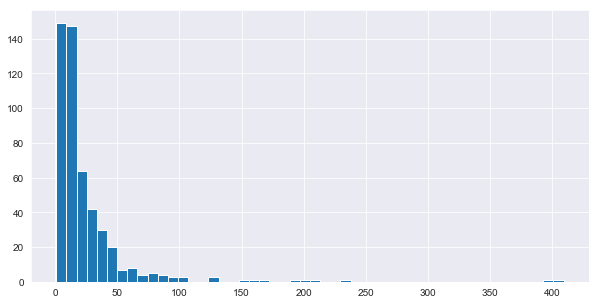

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(wordcount, bins=50)
# plt.scatter(wordcount, np.log(scores), s=.5)
plt.show()

/anaconda3/envs/live_plot/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


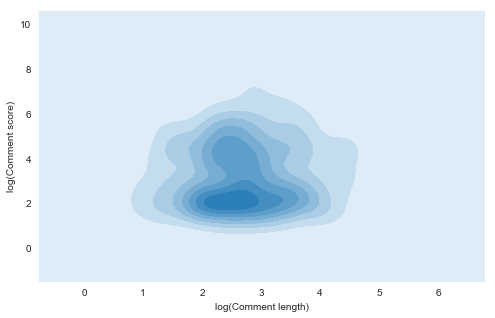

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(np.log(wordcount), np.log(scores), shade=True)
plt.xlabel('log(Comment length)')
plt.ylabel('log(Comment score)')
plt.show()

In [ ]:
def clean_text(text):
    """Pass in string. Remove punctuation and stop words and return stemmed list."""
    re_pattern = re.compile('[' + re.escape(string.punctuation) + '\\d\\r\\t\\n]')
    text = re_pattern.sub(' ', text)
    stemmed = [ps.stem(word) for word in word_tokenize(text)
               if word not in stop_words and len(word) > 2]
    return stemmed

ps = PorterStemmer()
stop_words = stopwords.words('English')

body_combined = ' '.join(body)
cleaned = clean_text(body_combined)

### Testing a bot
https://www.reddit.com/wiki/bottiquette

https://www.reddit.com/r/test

### Image Source
https://www.theverge.com/2018/3/14/17121066/reddit-promoted-posts-mobile-app